In [1]:
import pandas as pd
import numpy as np

In [2]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 42s 4us/step


In [21]:
y_train[0]

5

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [15]:
single_image = X_train[1]

In [16]:
single_image.shape

(28, 28)

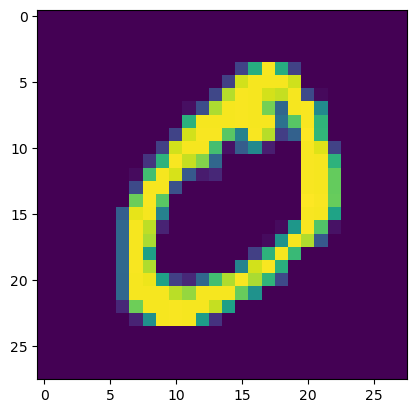

In [17]:
plt.imshow(single_image)

## preprocessing LABELS

In [18]:
from tensorflow.keras.utils import to_categorical

In [19]:
y_train.shape

(60000,)

In [22]:
y_cat_test = to_categorical(y_test, 10)

In [23]:
y_cat_train = to_categorical(y_train,10)

In [24]:
X_train = X_train/255
y_train = y_train/255

In [25]:
scaled_single = X_train[0]

In [26]:
scaled_single.max()

1.0

## Reshaping the data

In [28]:
X_train.shape

(60000, 28, 28)

In [29]:
X_test.shape

(10000, 28, 28)

In [31]:
X_train = X_train.reshape(60000,28,28,1)

In [32]:
X_train.shape

(60000, 28, 28, 1)

In [33]:
X_test = X_test.reshape(10000,28,28,1)

In [34]:
X_test.shape

(10000, 28, 28, 1)

In [71]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))

# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(128, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))

# https://keras.io/metrics/
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) # we can add in additional metrics 

D:\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [72]:
from tensorflow.keras.callbacks import EarlyStopping

In [91]:
early_stop = EarlyStopping(monitor='val_loss', patience=4)

In [92]:
## Train the Model

In [93]:
model.fit(X_train, y_cat_train, epochs=10, validation_data=(X_test, y_cat_test), callbacks=[early_stop])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9991 - loss: 0.0027 - val_accuracy: 0.9708 - val_loss: 57.3541
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9990 - loss: 0.0028 - val_accuracy: 0.9235 - val_loss: 178.5964
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9993 - loss: 0.0024 - val_accuracy: 0.9665 - val_loss: 66.1109
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9988 - loss: 0.0037 - val_accuracy: 0.9674 - val_loss: 64.1349
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9994 - loss: 0.0017 - val_accuracy: 0.9271 - val_loss: 175.3746


In [94]:
prediction = np.argmax(model.predict(X_test), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [95]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [96]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       1.00      0.93      0.96      1135
           2       0.98      0.90      0.94      1032
           3       0.97      0.93      0.95      1010
           4       0.98      0.95      0.97       982
           5       1.00      0.73      0.85       892
           6       0.93      0.99      0.96       958
           7       0.99      0.90      0.94      1028
           8       0.65      1.00      0.79       974
           9       0.95      0.93      0.94      1009

    accuracy                           0.93     10000
   macro avg       0.94      0.93      0.93     10000
weighted avg       0.94      0.93      0.93     10000

